In [1]:
%pylab inline
from scipy.optimize import curve_fit
import pandas as pd
from ipywidgets import interact
#import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


In [3]:
n = 21
g = 9.806
v0 = 12.22
y0 = 0.33
sy = 0.5
data_x = linspace(0,2,n)
data_y = y0 + v0*data_x - 0.5*g*data_x**2 + randn(n)*sy
data_sy = sy + randn(n)*sy/10

d = pd.DataFrame(data={'time':[round(x,2) for x in data_x],
                       'pos':[round(x,2) for x in data_y],
                       's_pos':[round(x,2) for x in data_sy]})

#d
#d.to_excel("data.xls")

In [2]:
d = pd.read_excel("data.xls")

In [3]:
d

,time,pos,s_pos
0,0.0,0.16,0.42
1,0.1,3.12,0.53
2,0.2,2.82,0.55
3,0.3,3.70,0.48
4,0.4,4.39,0.45
5,0.5,5.90,0.51
6,0.6,5.45,0.48
7,0.7,7.27,0.48
8,0.8,6.39,0.44
9,0.9,6.91,0.50


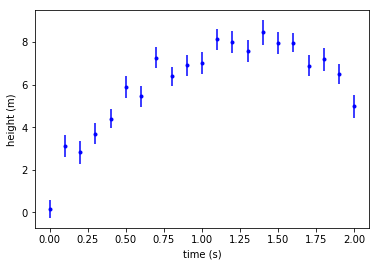

In [4]:
errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.')
ylabel("height (m)")
xlabel("time (s)")
savefig("dataonly.pdf")

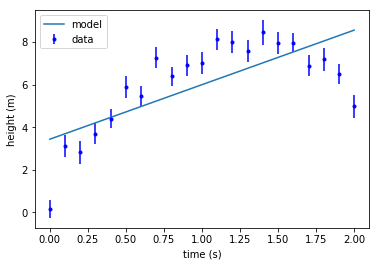

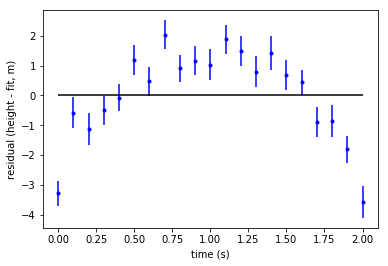

In [15]:
def model(x,m,b):
    return m*x+b

init_guess = [1,1]

fit = curve_fit(model, d['time'],d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)
ans,cov = fit
fit_m,fit_b = ans

errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")

t = linspace(0,2)
plot(t,model(t,fit_m,fit_b), label="model")
legend()

savefig("linearmodel.pdf")

figure()
errorbar(d['time'],d['pos']-model(d['time'],fit_m,fit_b),d['s_pos'],fmt='b.')
hlines(0,d['time'].min(),d['time'].max())
ylabel("residual (height - fit, m)")
xlabel("time (s)")
savefig("linearresiduals.pdf")

In [9]:
def runMe(y0,v0,a):
    def model(t,y0,v0,a):
        return y0 + v0*t + 0.5*a*t**2

    init_guess = [1,1,-10]

    errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
    ylabel("height (m)")
    xlabel("time (s)")

    t = linspace(0,2)
    plot(t,model(t,y0,v0,a), label="model")
    #legend()
    
    chisq = sum((d['pos'] - model(d['time'],y0,v0,a))**2/d['s_pos']**2)
    
    figtext(0.15,0.8,"chi-square: %.2f"%chisq,fontweight="bold")

interact(runMe,y0=(-2.0,5.0),v0=(0.0,20.0),a=(-15.0,-5.0))

interactive(children=(FloatSlider(value=1.5, description='y0', max=5.0, min=-2.0), FloatSlider(value=10.0, des…

<function __main__.runMe(y0, v0, a)>

y0: 0.75 +/- 0.28
v0: 11.29 +/- 0.67
a: -8.81 +/- 0.65


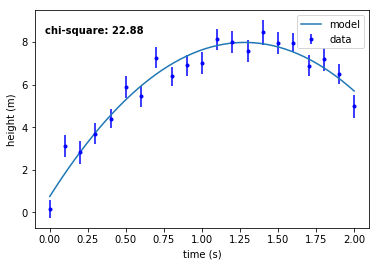

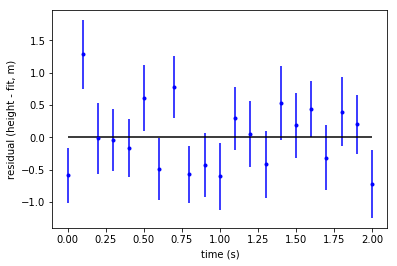

In [5]:
def model(t,y0,v0,a):
    return y0 + v0*t + 0.5*a*t**2

init_guess = [1,1,-10]

fit = curve_fit(model, d['time'],d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)
ans,cov = fit
y0,v0,a = ans
sy0,sv0,sa = sqrt(diag(cov))

errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")

t = linspace(0,2)
plot(t,model(t,y0,v0,a), label="model")
legend()

chisq = sum((d['pos'] - model(d['time'],y0,v0,a))**2/d['s_pos']**2)

figtext(0.15,0.8,"chi-square: %.2f"%chisq,fontweight="bold")

savefig("parabolicmodel_withchisq.pdf")

print("y0: %.2f +/- %.2f"%(y0,sy0))
print("v0: %.2f +/- %.2f"%(v0,sv0))
print("a: %.2f +/- %.2f"%(a,sa))

figure()
errorbar(d['time'],d['pos']-model(d['time'],y0,v0,a),d['s_pos'],fmt='b.')
hlines(0,d['time'].min(),d['time'].max())
ylabel("residual (height - fit, m)")
xlabel("time (s)")
savefig("residuals.pdf")

In [6]:
cov

array([[ 0.08026634, -0.15748225,  0.12845852],
       [-0.15748225,  0.44448966, -0.41768005],
       [ 0.12845852, -0.41768005,  0.42183325]])

In [8]:
def corrFromCov(cov):
    vs = diag(cov)
    return cov / sqrt(matrix(vs).transpose() @ matrix(vs))

In [9]:
corrFromCov(cov)

matrix([[ 1.        , -0.83374651,  0.69811306],
        [-0.83374651,  1.        , -0.96458943],
        [ 0.69811306, -0.96458943,  1.        ]])

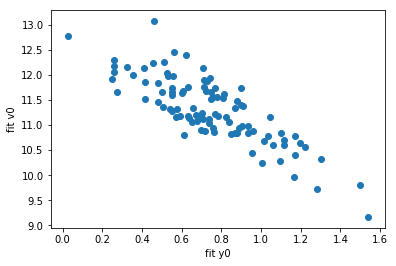

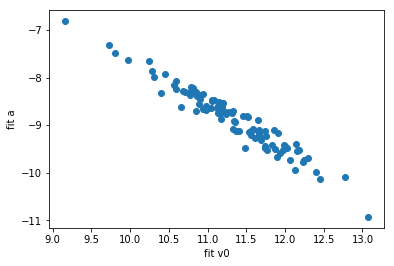

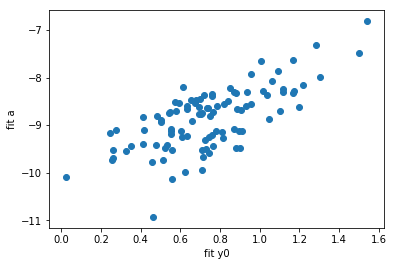

In [75]:
x = multivariate_normal(ans,cov,100)
figure()
scatter(x[:,0],x[:,1]); xlabel("fit y0"); ylabel("fit v0")
savefig("y0vsv0.pdf")
figure()
scatter(x[:,1],x[:,2]); xlabel("fit v0"); ylabel("fit a")
savefig("avsv0.pdf")
figure()
scatter(x[:,0],x[:,2]); xlabel("fit y0"); ylabel("fit a")
savefig("avsy0.pdf")

27.60966411502066
25.32032666540403
27.687497495656963
23.720264390004736
24.184246304720443
26.97984155936229
28.001428343638686
24.86984507485839
27.86906494157683
25.184443413330314


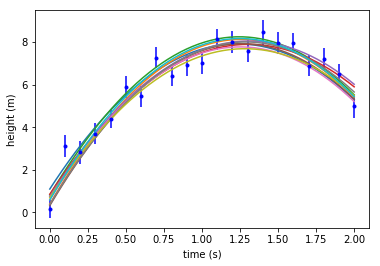

In [43]:
errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")

def model(t,y0,v0,a):
    return y0 + v0*t + 0.5*a*t**2

x = multivariate_normal(ans,cov,10)
t = linspace(0,2)

for i in range(x.shape[0]):
    y0,v0,a = x[i,:]

    plot(t,model(t,y0,v0,a), label="model")
    chisq = sum((d['pos'] - model(d['time'],y0,v0,a))**2/d['s_pos']**2)
    print(chisq)


savefig("manyfits.pdf")

hpeak: 7.98 +/- 0.15
tpeak: 1.28 +/- 0.03
a: -8.81 +/- 0.65
calculated y0: 0.75 +/- 0.64
calculated v0: 11.29 +/- 0.87


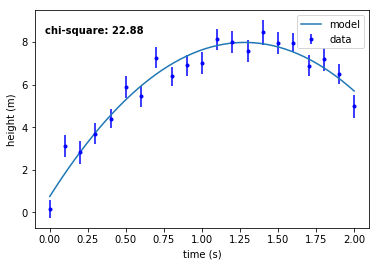

In [10]:
def model(t,hpeak,tpeak,a):
    return hpeak + 0.5*a*(t-tpeak)**2

init_guess = [10,1,-10]

fit = curve_fit(model, d['time'],d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)
ans,cov = fit
hp,tp,a = ans
shp,stp,sa = sqrt(diag(cov))

errorbar(d['time'],d['pos'],d['s_pos'],fmt='b.', label="data")
ylabel("height (m)")
xlabel("time (s)")

t = linspace(0,2)
plot(t,model(t,hp,tp,a), label="model")
legend()

chisq = sum((d['pos'] - model(d['time'],hp,tp,a))**2/d['s_pos']**2)

figtext(0.15,0.8,"chi-square: %.2f"%chisq,fontweight="bold")

savefig("parabolicmodel_withchisq.pdf")
print("hpeak: %.2f +/- %.2f"%(hp,shp))
print("tpeak: %.2f +/- %.2f"%(tp,stp))
print("a: %.2f +/- %.2f"%(a,sa))

print("calculated y0: %.2f +/- %.2f"%(hp+0.5*a*tp**2,sqrt(shp**2 + (tp**2*sa/2)**2 + (a*tp*stp)**2)))
print("calculated v0: %.2f +/- %.2f"%(-a*tp,sqrt((a*stp)**2 + (tp*sa)**2)))

In [11]:
cov

array([[ 0.02296723, -0.00093857, -0.06051883],
       [-0.00093857,  0.00085685,  0.01390923],
       [-0.06051883,  0.01390923,  0.42183321]])

In [12]:
corrFromCov(cov)

matrix([[ 1.        , -0.21157313, -0.61484526],
        [-0.21157313,  1.        ,  0.73160992],
        [-0.61484526,  0.73160992,  1.        ]])

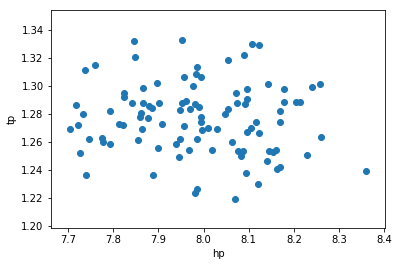

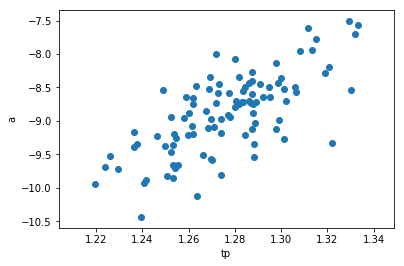

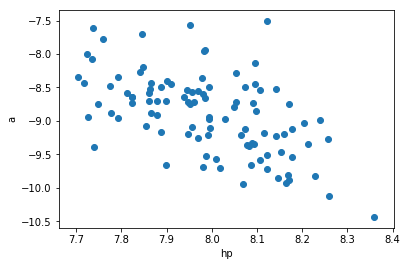

In [125]:
x = multivariate_normal(ans,cov,100)
figure()
scatter(x[:,0],x[:,1]); xlabel("hp"); ylabel("tp")
savefig("tpeak_vs_hpeak.pdf")
figure()
scatter(x[:,1],x[:,2]); xlabel("tp"); ylabel("a")
savefig("a_vs_tpeak.pdf")
figure()
scatter(x[:,0],x[:,2]); xlabel("hp"); ylabel("a")
savefig("a_vs_hpeak.pdf")

In [51]:
dg = sqrt(diag(cov))
dg * dg

array([0.02296723, 0.00085685, 0.42183321])

In [65]:
cov / (matrix(dg).transpose() @ matrix(dg))

matrix([[ 1.        , -0.21157313, -0.61484526],
        [-0.21157313,  1.        ,  0.73160992],
        [-0.61484526,  0.73160992,  1.        ]])

In [64]:
cov

array([[ 0.02296723, -0.00093857, -0.06051883],
       [-0.00093857,  0.00085685,  0.01390923],
       [-0.06051883,  0.01390923,  0.42183321]])